# Neural Network

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

* ### XOR gate problem

In [46]:
import random
import numpy as np

data = [[[0,0],[0]],
        [[0,1],[1]],
        [[1,0],[1]],
        [[1,1],[0]]]

X = [x[0] for x in data]
y = [x[1] for x in data]

In [47]:
X

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [48]:
# Neural Network 모델 정의
model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh(),
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [49]:
# 텐서로 변환
X = torch.tensor(X).float()
y = torch.tensor(y).float()

In [50]:
# loss function, Optimizer 정의
loss_func = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [51]:
loss_array = []
for i in range(2000):
    optimizer.zero_grad()
    output = model(X)   # forward pass

    loss = loss_func(output, y)
    loss.backward()
    optimizer.step()

    loss_array.append(loss)
    if i%100 == 0:
        print(loss.item())


0.7244429588317871
0.6105546951293945
0.43237075209617615
0.3857533037662506
0.3684818744659424
0.3601984977722168
0.3558095395565033
0.3532617390155792
0.35165834426879883
0.3505818247795105
0.349821537733078
0.34926286339759827
0.34883877635002136
0.3485085666179657
0.34824585914611816
0.3480328321456909
0.3478577733039856
0.34771159291267395
0.347588449716568
0.3474836051464081


In [52]:
output = model(X)
print(output)

tensor([[5.0044e-01],
        [9.9934e-01],
        [4.9955e-01],
        [8.4046e-04]], grad_fn=<SigmoidBackward0>)


* ### Regression 문제 해결

In [53]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
X = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (X**2) + 3
y_noise = y + noise

In [54]:
X.shape

torch.Size([1000, 1])

In [55]:
# model 정의
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

In [56]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

In [57]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.6943],
         [-0.3894],
         [-0.6919],
         [-0.6052],
         [ 0.1149],
         [-0.9395]], requires_grad=True),
 Parameter containing:
 tensor([-0.3949, -0.6547,  0.3074, -0.7114, -0.9639, -0.0080],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.3686, -0.1276, -0.2438,  0.3600,  0.3332, -0.2409],
         [ 0.3012, -0.0593, -0.3676, -0.2887,  0.3026, -0.1538],
         [-0.0391, -0.3284, -0.0603,  0.0416,  0.2678, -0.3471],
         [ 0.1855, -0.0755, -0.0907,  0.2352,  0.1302, -0.1245],
         [ 0.0948, -0.1624, -0.3877,  0.2221, -0.1743,  0.2092],
         [-0.2022,  0.0747,  0.2502, -0.2913, -0.0916, -0.1320],
         [ 0.3808,  0.2346,  0.2085, -0.0404,  0.0139,  0.0811],
         [-0.3380,  0.4068, -0.4042,  0.1998, -0.2057, -0.1438],
         [ 0.1654, -0.3537, -0.0904,  0.3847,  0.1823, -0.2789],
         [ 0.3795,  0.4045, -0.1381, -0.0395,  0.3820, -0.0116]],
        requires_grad=True),
 Parameter conta

In [58]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(X)

    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()

    loss_array.append(loss.detach().numpy())

    if i%1000 == 0:
        print(loss)

tensor(80.9343, grad_fn=<MeanBackward0>)
tensor(80.4671, grad_fn=<MeanBackward0>)
tensor(79.2620, grad_fn=<MeanBackward0>)
tensor(20.0403, grad_fn=<MeanBackward0>)
tensor(18.5828, grad_fn=<MeanBackward0>)
tensor(17.0027, grad_fn=<MeanBackward0>)
tensor(14.8399, grad_fn=<MeanBackward0>)
tensor(11.7672, grad_fn=<MeanBackward0>)
tensor(8.5825, grad_fn=<MeanBackward0>)
tensor(5.7981, grad_fn=<MeanBackward0>)


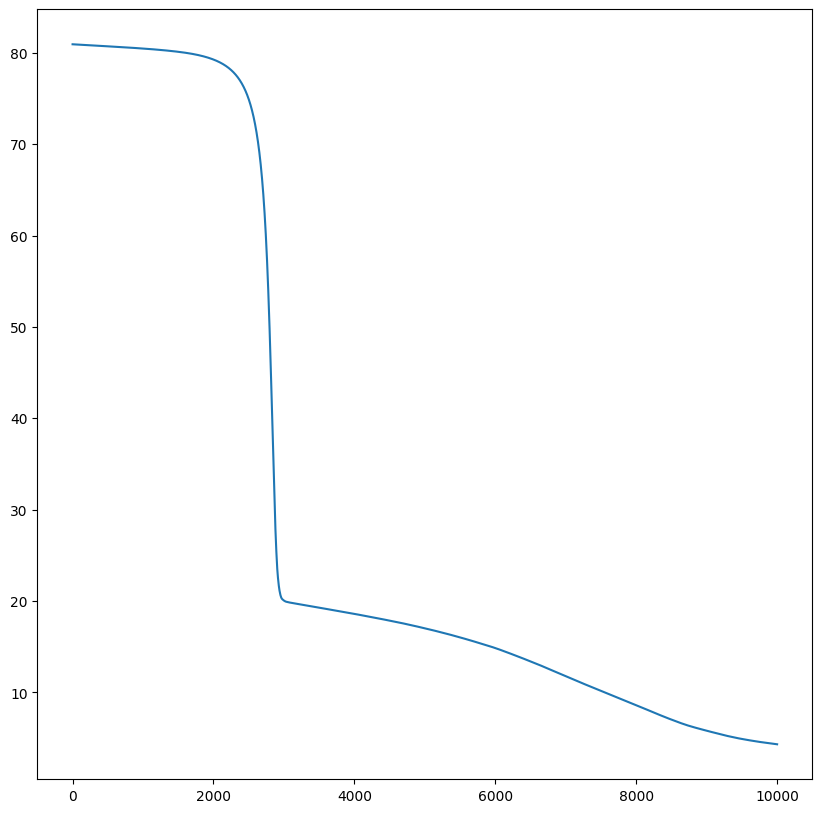

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.plot(loss_array)
plt.show()

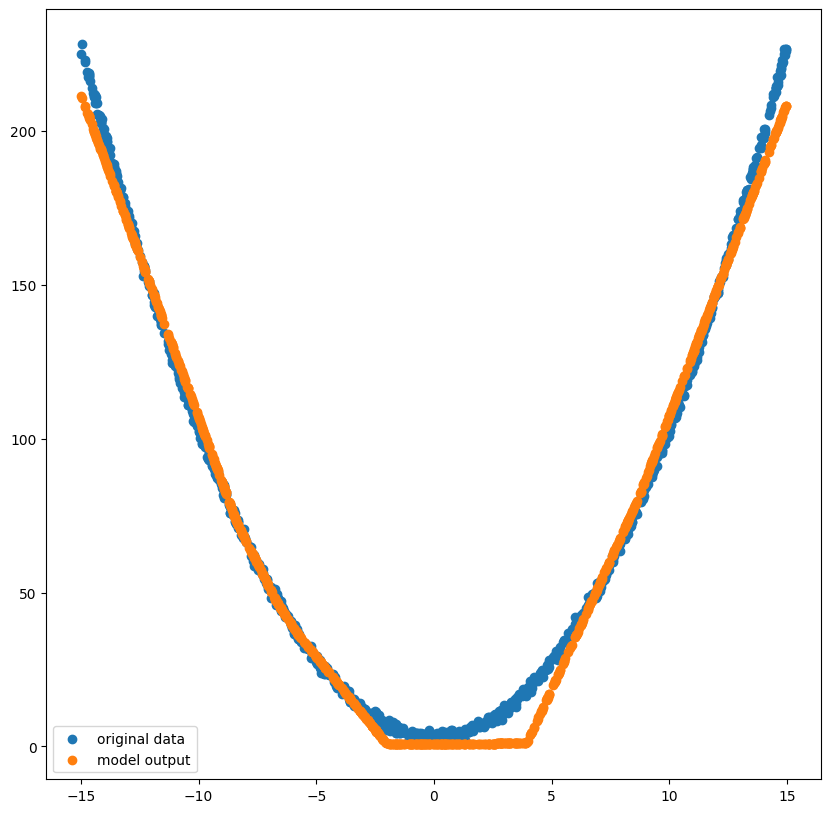

In [60]:
plt.figure(figsize = (10, 10))
plt.scatter(X.detach().numpy(), y_noise, label = 'original data')
plt.scatter(X.detach().numpy(), output.detach().numpy(), label = 'model output')
plt.legend()
plt.show()

* ### Boston Housing Price

1. 데이터 준비

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)

In [63]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [64]:
df.shape

(506, 14)

In [65]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [67]:
X = df.drop(columns=[13]).values
y = df[13].values

In [68]:
X_tensor = torch.tensor(X).float()
y_tensor = torch.tensor(y[:, np.newaxis]).float()

2. 뉴럴네트워크 모델 생성

In [69]:
model = nn.Sequential(
    nn.Linear(13, 16),
    nn.Tanh(),
    nn.Linear(16, 8),
    nn.Tanh(),
    nn.Linear(8, 1)
)

3. 손실함수 및 최적화 기법 정의

In [70]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

4. 학습 iterations

In [71]:
for i in range(3000):
    optimizer.zero_grad()

    output = model(X_tensor)
    loss = loss_func(output, y_tensor)

    loss.backward()
    optimizer.step()

    if i%1000 == 0:
        print(loss.item())

576.0494384765625
497.3732604980469
453.13946533203125


5. 모델 평가

In [72]:
output = model(X_tensor)
err = torch.mean(torch.abs(output - y_tensor))
print(err)


tensor(18.2569, grad_fn=<MeanBackward0>)


6. 모델 저장 및 불러오기

In [73]:
torch.save(model, "model.pth")

* ### 이진분류 문제

1. 데이터 준비

In [74]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt


In [75]:
X, y = make_moons(n_samples = 200)
noise = np.random.randn(200, 2)
X_noise = X + 0.25*noise

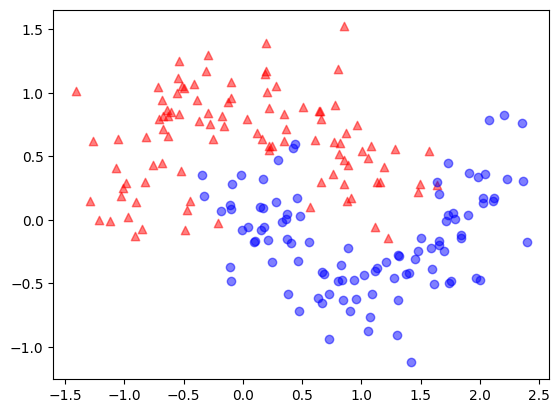

In [76]:
plt.scatter(X_noise[y==0, 0], X_noise[y==0, 1], c='red', marker='^', alpha=0.5)
plt.scatter(X_noise[y==1, 0], X_noise[y==1, 1], c='blue', marker='o', alpha=0.5)
plt.show()

In [77]:
X_tensor = torch.tensor(X_noise).float()
y_tensor = torch.tensor(y[:, np.newaxis]).float()

In [78]:
model = nn.Sequential(
    nn.Linear(2, 12),
    nn.Tanh(),
    nn.Linear(12, 6),
    nn.Tanh(),
    nn.Linear(6, 1),
    nn.Sigmoid()    # 이진 분류를 위한 NN output layer의 활성화 함수
)

In [79]:
loss_func = nn.BCELoss()        # 이진 분류를 위한 NN Loss function : Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [80]:
for i in range(3000):
    optimizer.zero_grad()

    output = model(X_tensor)
    loss = loss_func(output, y_tensor)

    loss.backward()
    optimizer.step()

    if i%500 == 0:
        print(loss.item())

0.670616865158081
0.008786405436694622
0.005777455400675535
0.00013115667388774455
5.26345320395194e-05
2.911432966357097e-05


In [81]:
output = model(X_tensor)        # 모델의 출력은 0~1 사이 값 (sigmoid) : True일 확률을 의미
pred = output > 0.5             # True일 확률이 0.5 이상인 경우만

In [82]:
pred

tensor([[False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True

In [83]:
pred_np = pred.detach().numpy()
pred_np = pred_np[:,0]
pred_np

array([False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,

In [84]:
acc = np.mean(pred_np == y)
print(acc)

1.0


In [85]:
torch.save(model, 'binary_classification_model.pth')

## 피마 인디언 당뇨병 Classification

In [88]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

1. 데이터 준비

In [89]:
df = pd.read_csv("diabetes.csv")

In [90]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [91]:
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

X_tensor = torch.tensor(X).float()
y_tensor = torch.tensor(y[:,np.newaxis]).float()

2. 뉴럴네트워크 모델 생성

In [92]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()        # binary classification
)


3. 손실함수 및 최적화 기법 정의

In [93]:
loss_func = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

4. 학습 iterations

In [94]:
for i in range(3000):
    optimizer.zero_grad()

    output = model(X_tensor)
    loss = loss_func(output, y_tensor)

    loss.backward()
    optimizer.step()

    if i%200 == 0:
        print("iteration: ", i, ", loss : ", loss.item())

iteration:  0 , loss :  1.0968472957611084
iteration:  200 , loss :  0.5786665678024292
iteration:  400 , loss :  0.5492894649505615
iteration:  600 , loss :  0.5101346373558044
iteration:  800 , loss :  0.4808640480041504
iteration:  1000 , loss :  0.45282089710235596
iteration:  1200 , loss :  0.4266352355480194
iteration:  1400 , loss :  0.40900734066963196
iteration:  1600 , loss :  0.39624056220054626
iteration:  1800 , loss :  0.38799288868904114
iteration:  2000 , loss :  0.3814566433429718
iteration:  2200 , loss :  0.37659135460853577
iteration:  2400 , loss :  0.3720066547393799
iteration:  2600 , loss :  0.3694188892841339
iteration:  2800 , loss :  0.36684533953666687


5. 모델 평가

In [95]:
output = model(X_tensor)
pred = output > 0.5

In [96]:
pred_np = pred[:,0].detach().numpy()
acc = np.mean(y == pred_np)
print(acc)

0.8411458333333334


## Iris 데이터셋 분류

1. 데이터 준비

In [97]:
df = pd.read_csv("Iris.csv")
data_set = df.values

In [98]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
X = data_set[:,1:5]
y_cls = data_set[:,5]

In [100]:
y_cls

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [101]:
# Scikit-learn의 LabelEncoder를 이용하여 문자열 형태의 클래스 정보를 정수 형태로 변환
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y_cls)
y = e.transform(y_cls)

In [102]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [103]:
# Tensor 변환
X_tensor = torch.tensor(X.astype(float)).float()
y_tensor = torch.tensor(y.astype(np.int64))

2. 뉴럴네트워크 모델 생성

In [104]:
# 다중 분류에서는 출력층에서 activation function 사용 안함
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 3),
)


3. 손실함수 및 최적화 기법 정의

In [105]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

4. 학습 iterations

In [106]:
for i in range(3000):
    optimizer.zero_grad()

    output = model(X_tensor)
    loss = loss_func(output, y_tensor)

    loss.backward()
    optimizer.step()

    if i%200 == 0:
        print("iteration: ", i, ", loss : ", loss.item())

iteration:  0 , loss :  1.1694985628128052
iteration:  200 , loss :  0.41723233461380005
iteration:  400 , loss :  0.12215837836265564
iteration:  600 , loss :  0.0723235234618187
iteration:  800 , loss :  0.05889371410012245
iteration:  1000 , loss :  0.052912142127752304
iteration:  1200 , loss :  0.04945014789700508
iteration:  1400 , loss :  0.04707063362002373
iteration:  1600 , loss :  0.045253027230501175
iteration:  1800 , loss :  0.04379316791892052
iteration:  2000 , loss :  0.04260997846722603
iteration:  2200 , loss :  0.041672635823488235
iteration:  2400 , loss :  0.04096612706780434
iteration:  2600 , loss :  0.04046988487243652
iteration:  2800 , loss :  0.040148504078388214


5. 모델 평가

In [107]:
output = model(X_tensor)

In [108]:
output

tensor([[ 7.7177e+00, -2.2396e+00, -1.0160e+01],
        [ 6.9604e+00, -1.6361e+00, -9.2541e+00],
        [ 7.3307e+00, -2.1018e+00, -9.6489e+00],
        [ 6.9138e+00, -1.7488e+00, -9.1561e+00],
        [ 7.7769e+00, -2.2607e+00, -1.0238e+01],
        [ 7.3616e+00, -1.5426e+00, -9.8506e+00],
        [ 7.2673e+00, -2.0792e+00, -9.5651e+00],
        [ 7.4095e+00, -1.9865e+00, -9.7934e+00],
        [ 6.7490e+00, -1.7491e+00, -8.9219e+00],
        [ 7.1791e+00, -1.8369e+00, -9.5082e+00],
        [ 7.9053e+00, -2.2242e+00, -1.0431e+01],
        [ 7.2186e+00, -1.8859e+00, -9.5506e+00],
        [ 7.1416e+00, -1.8862e+00, -9.4411e+00],
        [ 7.2085e+00, -2.0583e+00, -9.4876e+00],
        [ 8.6881e+00, -2.5851e+00, -1.1441e+01],
        [ 8.4793e+00, -2.5107e+00, -1.1166e+01],
        [ 8.0404e+00, -2.3545e+00, -1.0586e+01],
        [ 7.5063e+00, -2.0399e+00, -9.9159e+00],
        [ 7.4580e+00, -1.4515e+00, -1.0013e+01],
        [ 7.7798e+00, -2.2617e+00, -1.0242e+01],
        [ 7.0530e+00

In [109]:
pred = torch.argmax(output, dim=1)  # output에서 max값의 index
pred_np = pred.detach().numpy()

In [110]:
pred_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
acc = np.mean(pred_np == y)
print(acc)

0.9866666666666667


In [112]:
sm = nn.Softmax(dim=1)
prob = sm(output)
print(prob)

tensor([[9.9995e-01, 4.7377e-05, 1.7211e-08],
        [9.9982e-01, 1.8473e-04, 9.0796e-08],
        [9.9992e-01, 8.0075e-05, 4.2251e-08],
        [9.9983e-01, 1.7290e-04, 1.0493e-07],
        [9.9996e-01, 4.3723e-05, 1.5002e-08],
        [9.9986e-01, 1.3581e-04, 3.3481e-08],
        [9.9991e-01, 8.7266e-05, 4.8950e-08],
        [9.9992e-01, 8.3044e-05, 3.3792e-08],
        [9.9980e-01, 2.0380e-04, 1.5635e-07],
        [9.9988e-01, 1.2143e-04, 5.6590e-08],
        [9.9996e-01, 3.9883e-05, 1.0882e-08],
        [9.9989e-01, 1.1115e-04, 5.2141e-08],
        [9.9988e-01, 1.2000e-04, 6.2828e-08],
        [9.9991e-01, 9.4501e-05, 5.6098e-08],
        [9.9999e-01, 1.2709e-05, 1.8110e-09],
        [9.9998e-01, 1.6869e-05, 2.9402e-09],
        [9.9997e-01, 3.0588e-05, 8.1401e-09],
        [9.9993e-01, 7.1462e-05, 2.7139e-08],
        [9.9986e-01, 1.3508e-04, 2.5839e-08],
        [9.9996e-01, 4.3552e-05, 1.4902e-08],
        [9.9975e-01, 2.4622e-04, 6.5181e-08],
        [9.9991e-01, 9.3533e-05, 3

## CIFAR-10

In [113]:
import torch
import torchvision
import torchvision.transforms as transforms

In [114]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:12<00:00, 13927025.77it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


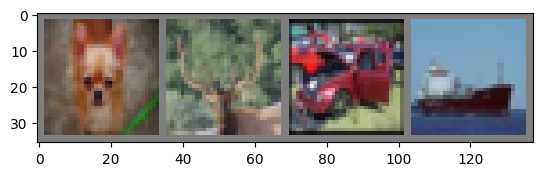

dog   deer  car   ship 


In [117]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
#dataiter = iter(trainloader)
#images, labels = dataiter.next()
images, labels = next(iter(trainloader))

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [118]:
# nn.Flatten(): 32x32x3 (3차원 배열) --> 3072 (1차원 배열)

model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(3072, 256),
    nn.ReLU(),

    nn.Linear(256, 128),
    nn.ReLU(),

    nn.Linear(128, 64),
    nn.ReLU(),

    nn.Linear(64, 10)
)

In [119]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.0001)

Training 단계

In [120]:
# 학습용 데이터셋으로 2회 반복
for epoch in range(2):

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후,
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_func(outputs, labels)

        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.306
[1,  4000] loss: 2.305
[1,  6000] loss: 2.301
[1,  8000] loss: 2.300
[1, 10000] loss: 2.297
[1, 12000] loss: 2.294
[2,  2000] loss: 2.293
[2,  4000] loss: 2.289
[2,  6000] loss: 2.286
[2,  8000] loss: 2.284
[2, 10000] loss: 2.282
[2, 12000] loss: 2.277
Finished Training


Test 단계

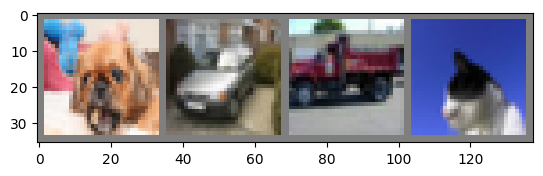

GroundTruth:  dog   car   truck cat  


In [122]:
#dataiter = iter(testloader)
#images, labels = dataiter.next()
images, labels = next(iter(trainloader))

# Testset의 4개 이미지를 출력해보기
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [123]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  ship  frog  truck ship 


전체 test data에 대하여 결과 확인

In [124]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요 없음
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산
        outputs = model(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 21 %
